### Load libraries

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb
import wandb.sdk

In [2]:
sys.path.append("../..")
from src.utils import runs_to_df

### Load data

In [3]:
api = wandb.Api()
runs: list[wandb.sdk.wandb_run.Run] = api.runs(
    f"data-frugal-learning/student-teacher-v2",
    filters={"tags": {"$in": ["overparam-scaling-4-2-1", "overparam-scaling-4-2-1-try2"]}},
)

df_all = runs_to_df(runs)
df = df_all[
    (df_all.state == "finished")
]
len(df)

609

In [4]:
df.optimizer.unique()

array(['OptimizerT.SGD', 'OptimizerT.AdamW'], dtype=object)

### AdamW

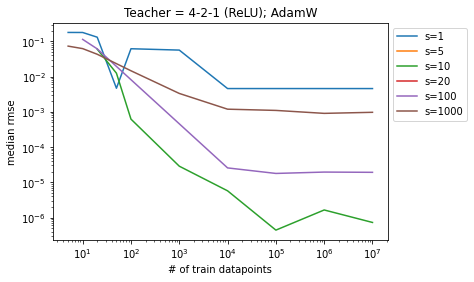

In [5]:
for s in sorted(df.student_width_scale_factor.unique()):
    cdf = (
        df[(df.optimizer == "OptimizerT.AdamW") & (df.student_width_scale_factor == s)]
        .sort_values("n_train")
        .groupby("n_train", as_index=False)
        .median()
    )
    plt.plot(cdf.n_train, cdf.test_rmse, label=f"{s=}")

plt.title("Teacher = 4-2-1 (ReLU); AdamW")
plt.ylabel("median rmse")
plt.xlabel("# of train datapoints")
plt.xscale("log")
plt.yscale("log")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1));

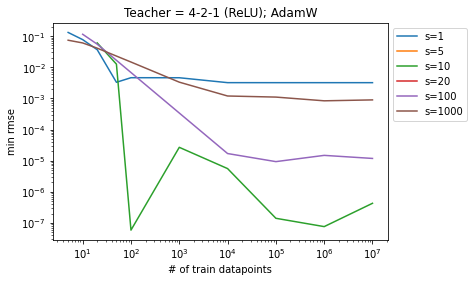

In [6]:
for s in sorted(df.student_width_scale_factor.unique()):
    cdf = (
        df[(df.optimizer == "OptimizerT.AdamW") & (df.student_width_scale_factor == s)]
        .sort_values("n_train")
        .groupby("n_train", as_index=False)
        .min()
    )

    plt.plot(cdf.n_train, cdf.test_rmse, label=f"{s=}")

plt.title("Teacher = 4-2-1 (ReLU); AdamW")
plt.ylabel("min rmse")
plt.xlabel("# of train datapoints")
plt.xscale("log")
plt.yscale("log")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1));

### Plots

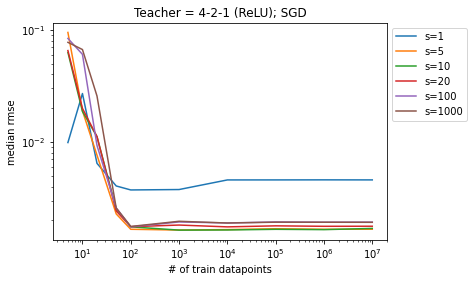

In [7]:
for s in sorted(df.student_width_scale_factor.unique()):
    cdf = (
        df[(df.optimizer == "OptimizerT.SGD") & (df.student_width_scale_factor == s)]
        .sort_values("n_train")
        .groupby("n_train", as_index=False)
        .median()
    )

    plt.plot(cdf.n_train, cdf.test_rmse, label=f"{s=}")

plt.title("Teacher = 4-2-1 (ReLU); SGD")
plt.ylabel("median rmse")
plt.xlabel("# of train datapoints")
plt.xscale("log")
plt.yscale("log")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1));

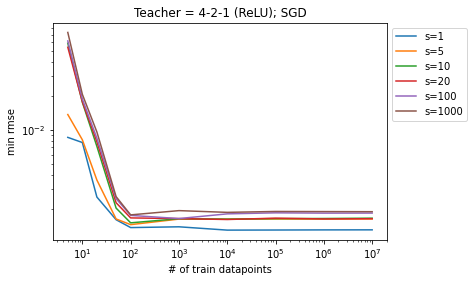

In [8]:
for s in sorted(df.student_width_scale_factor.unique()):
    cdf = (
        df[(df.optimizer == "OptimizerT.SGD") & (df.student_width_scale_factor == s)]
        .sort_values("n_train")
        .groupby("n_train", as_index=False)
        .min()
    )

    plt.plot(cdf.n_train, cdf.test_rmse, label=f"{s=}")

plt.title("Teacher = 4-2-1 (ReLU); SGD")
plt.ylabel("min rmse")
plt.xlabel("# of train datapoints")
plt.xscale("log")
plt.yscale("log")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1));